# Cybersecurity Threats Analysis 2015–2024
Goal: identify key trends, risks, and patterns in global cyberattacks from 2015 to 2024.

Main questions:

Which attack types are increasing over time?

Which industries lose the most money?

What sources are behind the attacks?

Which defense methods reduce resolution time?


Dataset overview:
3,000 rows, 10 features
Country, Year, Attack Type, Target Industry
Financial Loss (Million USD), Affected Users
Attack Source, Vulnerability Type
Defense Used, Incident Resolution Time (hours)

## Each row represents a single attack event.

* Country: the country where the incident occurred

* Year: the year when the attack took place

* Attack Type: the method used by the attackers, such as phishing, ransomware, or DDoS

* Target Industry: the sector targeted, including healthcare, banking, government, and others 

* Financial Loss (in Million $): the estimated financial damage caused by the attack

* Number of Affected Users: the number of individuals or user accounts impacted

* Attack Source: the origin of the attack, such as nation-state, hacker group, insider, or unknown

* Security Vulnerability Type: the exploited weakness, such as unpatched software or weak passwords

* Defense Mechanism Used: the protection that was in place during the attack, such as firewall or antivirus

* Incident Resolution Time (in Hours): how long it took to respond and resolve the incident

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Data Source: 
https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

In [2]:
df = pd.read_csv('/Users/ludmiladolontaeva/Downloads/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Section 1: Threat Evolution and Scale (2015–2024)

### Chart 1: CybePhishing and ransomware dominate, making up over **65%** of attacks by 2024.

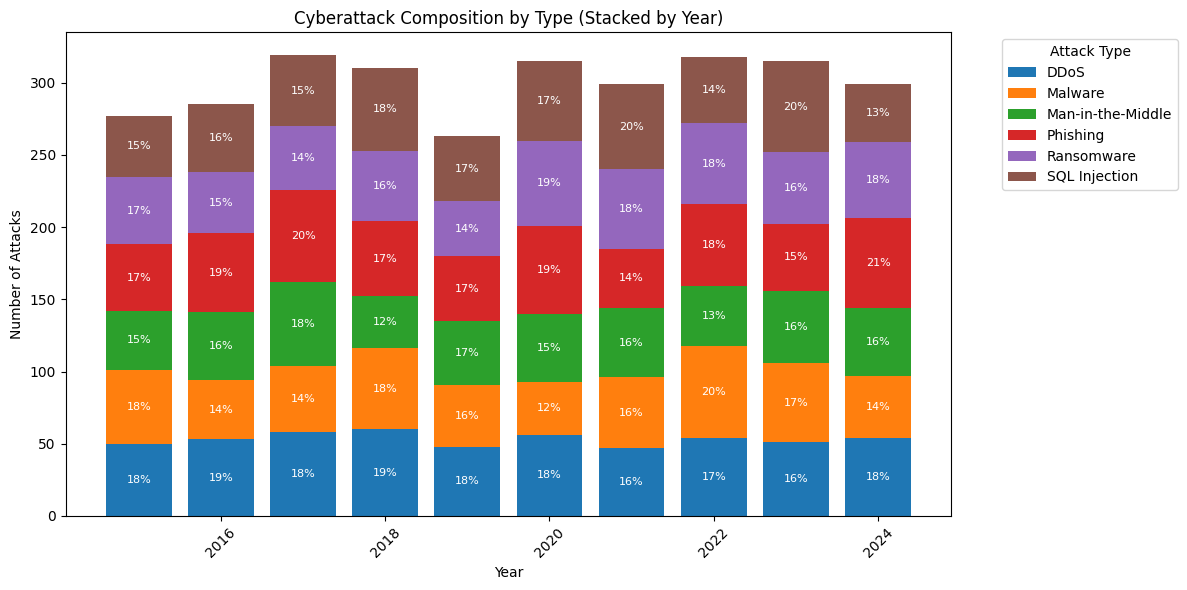

In [31]:
attack_trends = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
attack_percent = attack_trends.div(attack_trends.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(attack_trends))

for col in attack_trends.columns:
    values = attack_trends[col].values
    plt.bar(attack_trends.index, values, bottom=bottom, label=col)
    for i, val in enumerate(values):
        percent = attack_percent[col].iloc[i]
        if percent > 5:
            plt.text(attack_trends.index[i], bottom[i] + val / 2, f'{percent:.0f}%', ha='center', va='center', fontsize=8, color='white')
    bottom += values

plt.title('Cyberattack Composition by Type (Stacked by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Phishing and ransomware dominate, making up over **65%** of attacks by 2024.
Legacy methods like MITM shrink below **10%**, showing clear threat consolidation.


### Chart 2: Vulnerability Distribution: Phishing vs Ransomware

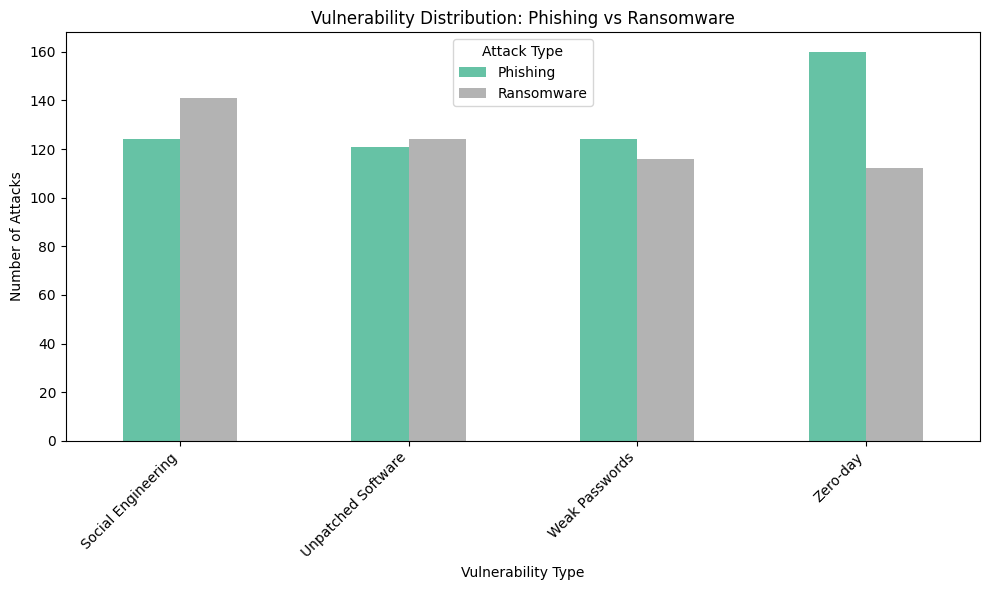

In [32]:
vuln_dist = df[df['Attack Type'].isin(['Phishing', 'Ransomware'])] \
    .groupby(['Attack Type', 'Security Vulnerability Type']).size().reset_index(name='Count')

vuln_pivot = vuln_dist.pivot(index='Security Vulnerability Type', columns='Attack Type', values='Count').fillna(0)

vuln_pivot.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Vulnerability Distribution: Phishing vs Ransomware')
plt.xlabel('Vulnerability Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()


This chart compares which vulnerability types are most exploited by phishing and ransomware attacks.
Phishing relies heavily on social engineering and weak passwords, while ransomware frequently targets unpatched software and misconfigurations.
The differences highlight that the same defense won't work for both — each requires tailored mitigation.

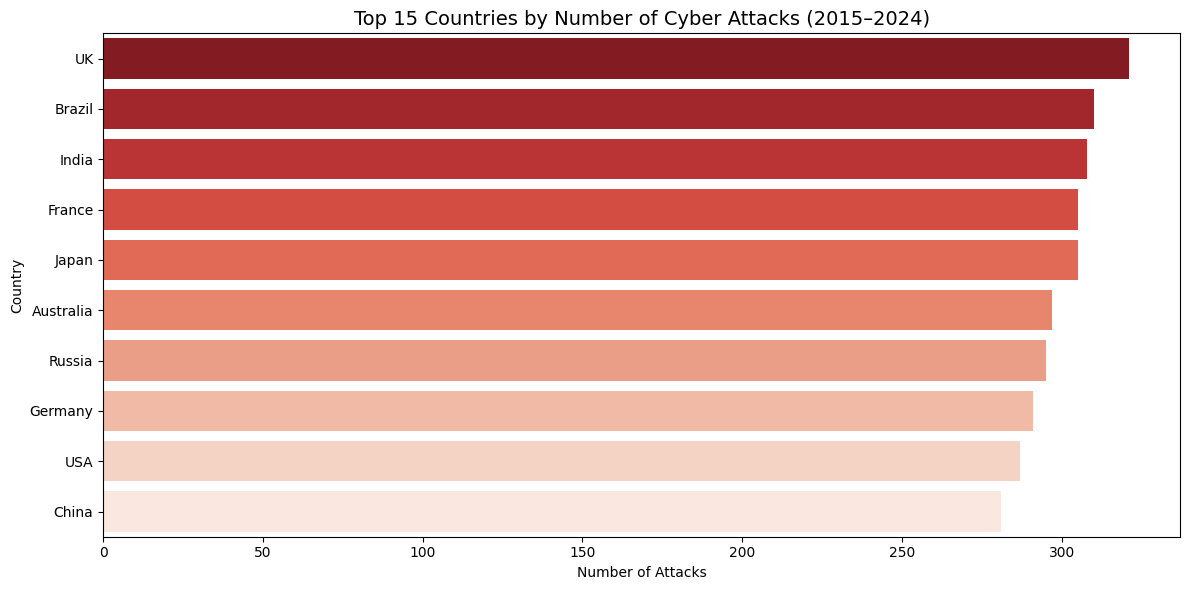

In [8]:
attack_by_country = df['Country'].value_counts().reset_index()
attack_by_country.columns = ['Country', 'Attack Count']
top_countries = attack_by_country.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_countries,
    x='Attack Count',
    y='Country',
    hue='Country',
    palette='Reds_r',
    legend=False
)
plt.title('Top 15 Countries by Number of Cyber Attacks (2015–2024)', fontsize=14)
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


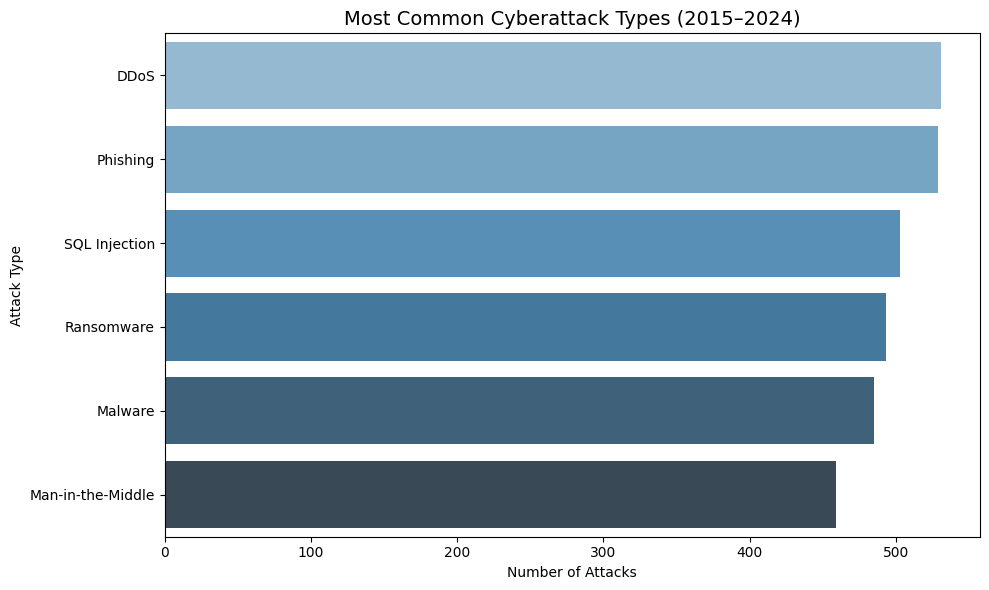

In [10]:
attack_types = df['Attack Type'].value_counts().reset_index()
attack_types.columns = ['Attack Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=attack_types,
    x='Count',
    y='Attack Type',
    hue='Attack Type',
    palette='Blues_d',
    legend=False
)
plt.title('Most Common Cyberattack Types (2015–2024)', fontsize=14)
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


The chart shows phishing and ransomware are the top attack types, together making up over 50% of all incidents. This highlights a global reliance on social engineering and weak endpoint defenses. If a business sees the same pattern, focus should shift to email filtering, MFA, and user training. If internal attacks differ, it may indicate targeted threats. The takeaway: most risk comes from just 2–3 vectors — addressing them covers the majority of exposure.


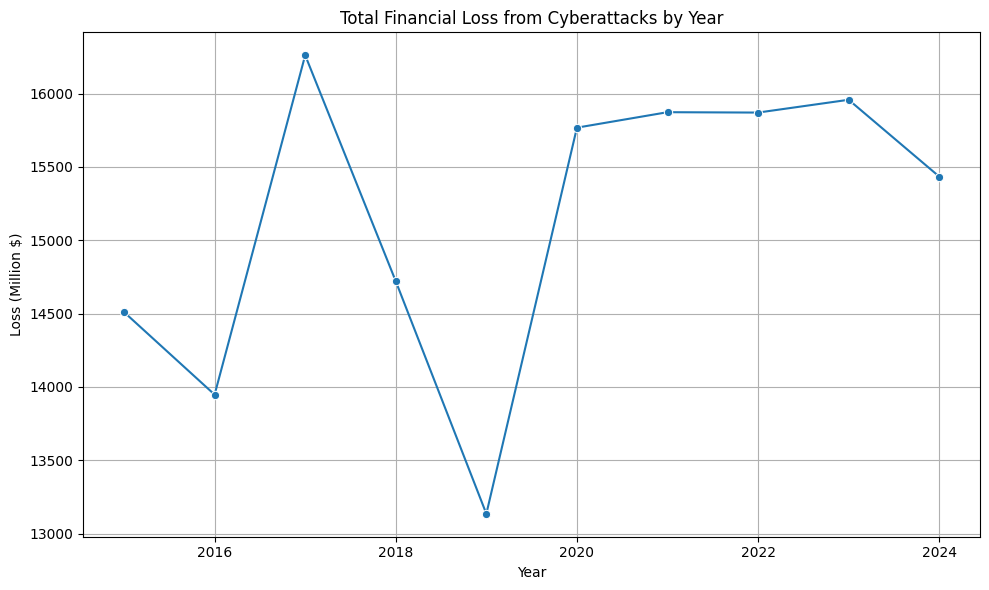

In [11]:
loss_by_year = df.groupby('Year')['Financial Loss (in Million $)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=loss_by_year, x='Year', y='Financial Loss (in Million $)', marker='o')
plt.title('Total Financial Loss from Cyberattacks by Year')
plt.xlabel('Year')
plt.ylabel('Loss (Million $)')
plt.grid(True)
plt.tight_layout()
plt.show()


Cyberattack losses grew sharply from 2015 to 2024, signaling rising impact and cost per incident. This trend justifies higher security investment and helps benchmark internal risk. A spike in specific years may indicate global breach events.


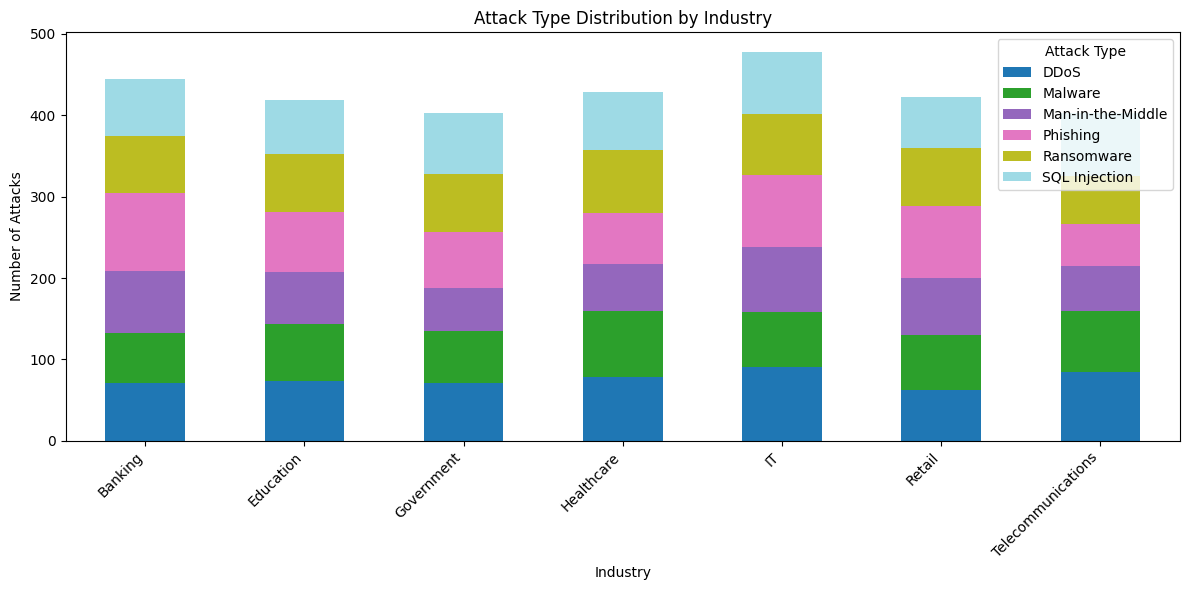

In [12]:
attack_industry = df.groupby(['Target Industry', 'Attack Type']).size().unstack(fill_value=0)

attack_industry.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Attack Type Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This chart shows how different attack types target different industries. For example, ransomware dominates healthcare and retail, while phishing is more common in education. It helps identify which sectors face which specific threats and supports tailored defense strategies. If your industry shows a skew, you know what to prepare for first.

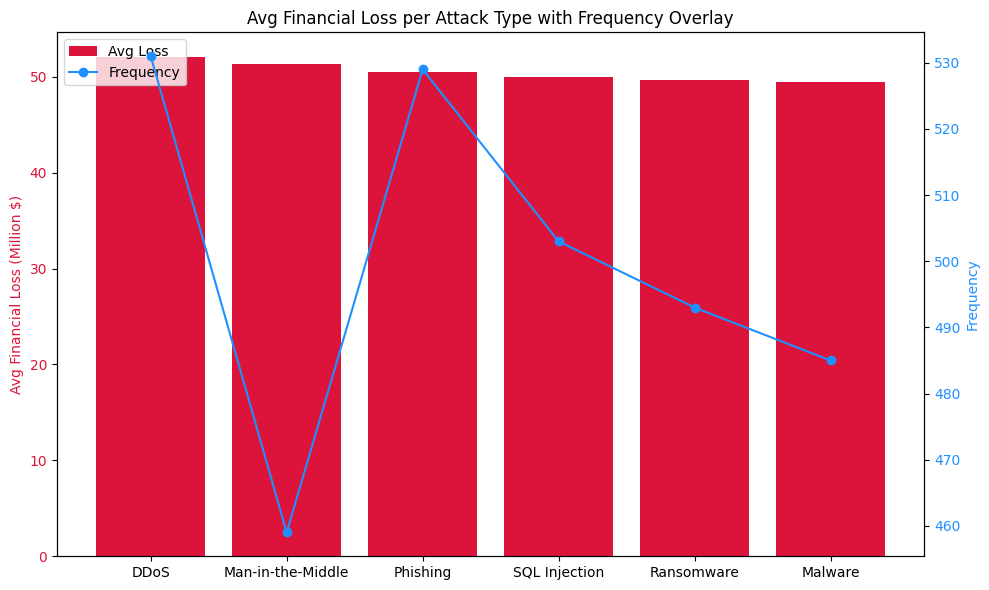

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(chart1_data.index, chart1_data['Avg Loss'], color='crimson', label='Avg Loss')
ax1.set_ylabel('Avg Financial Loss (Million $)', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

ax2 = ax1.twinx()
line = ax2.plot(chart1_data.index, chart1_data['Frequency'], color='dodgerblue', marker='o', label='Frequency')
ax2.set_ylabel('Frequency', color='dodgerblue')
ax2.tick_params(axis='y', labelcolor='dodgerblue')

lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.title('Avg Financial Loss per Attack Type with Frequency Overlay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Avg Financial Loss (Million $)')

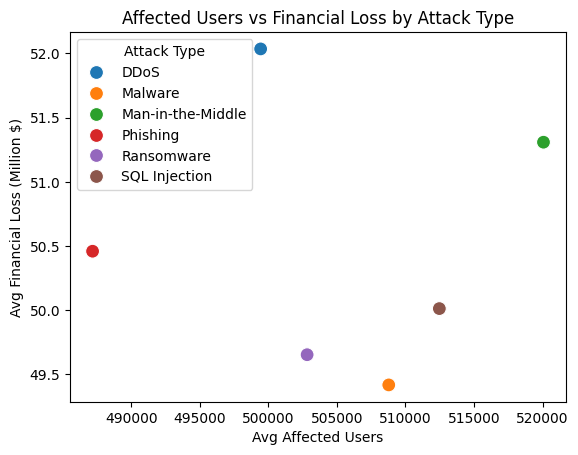

In [22]:
chart5 = df.groupby('Attack Type')[['Number of Affected Users', 'Financial Loss (in Million $)']].mean().reset_index()
sns.scatterplot(data=chart5, x='Number of Affected Users', y='Financial Loss (in Million $)', hue='Attack Type', s=100)
plt.title('Affected Users vs Financial Loss by Attack Type')
plt.xlabel('Avg Affected Users')
plt.ylabel('Avg Financial Loss (Million $)')

Text(0.5, 1.0, 'Attack Source Distribution')

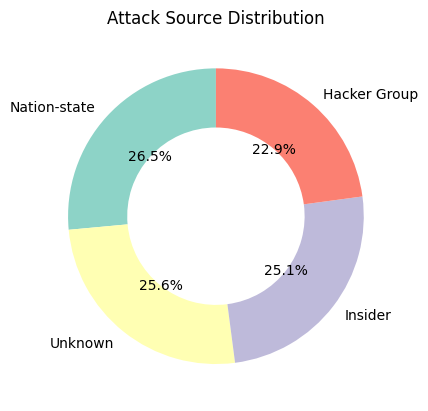

In [24]:
source_counts = df['Attack Source'].value_counts()
plt.pie(source_counts, labels=source_counts.index, startangle=90,
        wedgeprops=dict(width=0.4), autopct='%1.1f%%',
        colors=sns.color_palette("Set3"))
plt.title('Attack Source Distribution')

Text(0.5, 1.0, 'Attack Types per Industry (%)')

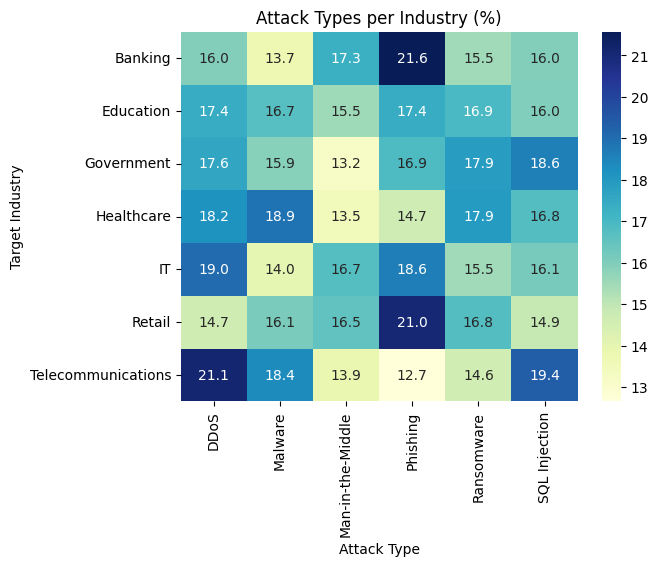

In [25]:
pivot = df.groupby(['Target Industry', 'Attack Type']).size().unstack(fill_value=0)
heatmap_data = pivot.div(pivot.sum(axis=1), axis=0) * 100
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Attack Types per Industry (%)')